<a href="https://colab.research.google.com/github/alsh02/basic-data-analysis-study/blob/main/%EA%B8%B0%EC%B4%88_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%8A%A4%ED%84%B0%EB%94%94_3%EC%B0%A8%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**기초 데이터 분석 스터디 3차시**
EDA가 무엇인지 알아보았으니, 이를 기반으로 실제 데이터를 다루어봅시다!

🪄보스턴 집값 데이터에 EDA를 적용해보려고 합니다🪄

최종적인 목표는 보스턴 내 소유 주택 가격의 중앙값을 예측하는 것입니다.(아래에서 살펴보겠지만 타겟변수가

그 값을 예측하고 값을 평가하는 것이 머신러닝 프로젝트입니다. 따라서 저희는 모델을 사용하기 직전 데이터 분석에 대해서 실습해보려고 합니다😁


## 0. 문제 정의
가장 우선시 되어야하는 것은 역시나 문제 정의입니다.
1. 어떤 문제를 풀어야하고,
2. 문제의 목표는 무엇이며,
3. 목표를 달성하기 위해 어떻게 할 것인가

이 3개에 대한 답을 차근차근 결정해봅시다!

저희는 ``1. 보스턴 집값 데이터 예측``이라는 문제를 해결해야합니다.

따라서 저희의 목적은 ``2. 보스턴 내 소유 주택 가격의 예측``입니다.

마지막으로 ``3. 데이터 분석을 통하여 주택 가격에 영향을 끼치는 변수를 파악한 뒤, 이를 회귀나 머신러닝 등의 방법으로 예측``할 것입니다.

## 1. 폰트 설정하기
구글 코랩은 구글의 서버 컴퓨터를 빌려서 쓰는 것이기 때문에 한글 폰트를 직접 깔아주어야 합니다.

다음 코드를 실행한 다음 런타임을 다시 실행하면 시각화를 진행할 때 깨짐없이 한글 폰트를 사용할 수 있습니다.

In [ ]:
!apt -qq -y install fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib/*

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/

## 2. 구글 드라이브 연동하기
구글 코랩은 구글의 서비스이기 때문에 구글 드라이브와 연동하여 드라이브 내 파일을 가져다 사용할 수 있습니다!

아래 코드를 실행하면 코랩과 구글 드라이브를 연동할 수 있습니다😊

연동에 성공하면 다음과 같이 출력됩니다.

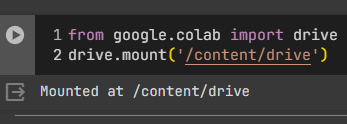

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. 필요한 라이브러리 불러오기
🤔🤔라이브러리란??
\
개발을 진행할 때 자주 사용하는 기능들을 개발자들이 필요와 목적에 따라 사용할 수 있도록 미리 모듈화 하여 모아 놓은 기능들의 집합!!

모든 기능을 우리가 개발할 수 없으니 이미 잘 만들어진 라이브러리를 가져와 편리하게 사용하자~


In [ ]:
import pandas as pd             # 데이터 분석을 위한 라이브러리
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리
import seaborn as sns           # 시각화를 위한 라이브러리

## 4. pandas 라이브러리로 csv 파일 불러오기
pandas는 데이터 분석과 관련된 다양한 기능들을 제공합니다.

이를 이용하여 구글 드라이브에 저장해놓은 Boston (1).csv 파일을 불러와봅시다!

```python
df = pd.read_csv("csv 파일 경로")
```
이 코드는 지정한 csv 파일 경로의 csv 파일을 읽어 df란 변수에 저장하는 코드입니다. 파이썬으로 데이터 분석을 하게 된다면 가장 많이 사용하게 될 코드죠!

``read_csv()``란 함수는 ``pandas``라는 라이브러리에 이미 선언되어있는 함수입니다.

csv 파일 경로 이외에도 ``encoding``이라는 매개변수를 가지고 있지만 코드 실행 시 오류가 발생하지 않는다면 추가해줄 필요는 없습니다👍

In [ ]:
# file_path는 시연을 보고 수정해주세요!
file_path = "/content/drive/MyDrive/기초 데이터 분석 스터디/기초 데이터 분석 스터디 3주차 데이터/Boston (1).csv"
df = pd.read_csv(file_path) # csv 파일 불러오기

## 5. 불러온 csv 파일 데이터 훑어보기
가져온 csv 파일은 첫번째 코드를 통해 최상단 5개의 행만 출력해 간략하게 확인해볼 수 있습니다!

또한, 두번째 코드로는 가져온 csv 파일의 변수명, non-null 개수, 자료형을 파악할 수 있습니다!


In [ ]:
df."---------직접 채우기---------" # 불러온 csv 파일의 최상단 5개의 행만 출력

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df."---------직접 채우기---------" # csv 파일의 간략한 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


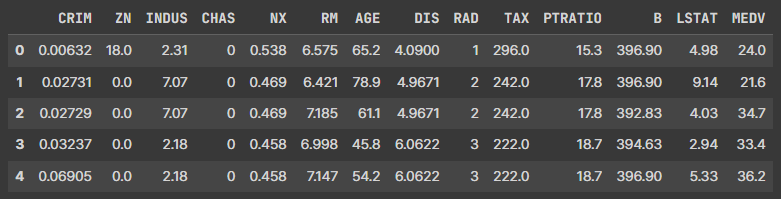

최상단 5개의 행을 살펴보면 총 14개의 변수를 가지고 있는 걸 확인할 수 있습니다!

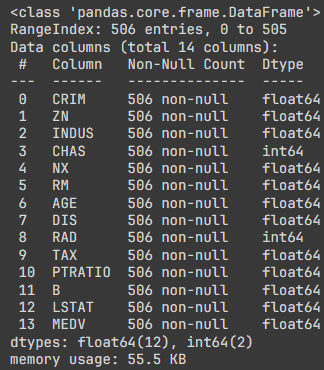

또한, ``info()``의 출력 결과를 통해서 null인 값은 없고, float와 int의 자료형으로 데이터가 구성되어있음을 살펴볼 수 있습니다!

아래에서 각각의 변수가 무엇을 의미하는지 알아봅시다😁

### 참고
```python
df.head()
```
가 아니라 직접 인덱싱을 하여 최상단 5개의 행을 가져오고 싶다면 아래처럼 쓸 수 있습니다.

In [ ]:
df."---------직접 채우기---------"

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

``loc()`` 함수를 이용해 다양한 방식으로 인덱싱을 할 수 있습니다.

만일, 가장 CRIM 변수값이 가장 큰 행의 AGE 값을 출력하기 위해서 다음과 같이 코드를 작성할 수 있습니다.

In [ ]:
df.loc[df['CRIM'].idxmax(), "---------직접 채우기---------"]

91.9

## 6. 데이터 Description 살펴보기
데이터 폴더에 들어있는 The Boston Housing Dataset.txt란 파일을 열어서 각 변수에 대한 내용을 알아봅시다.

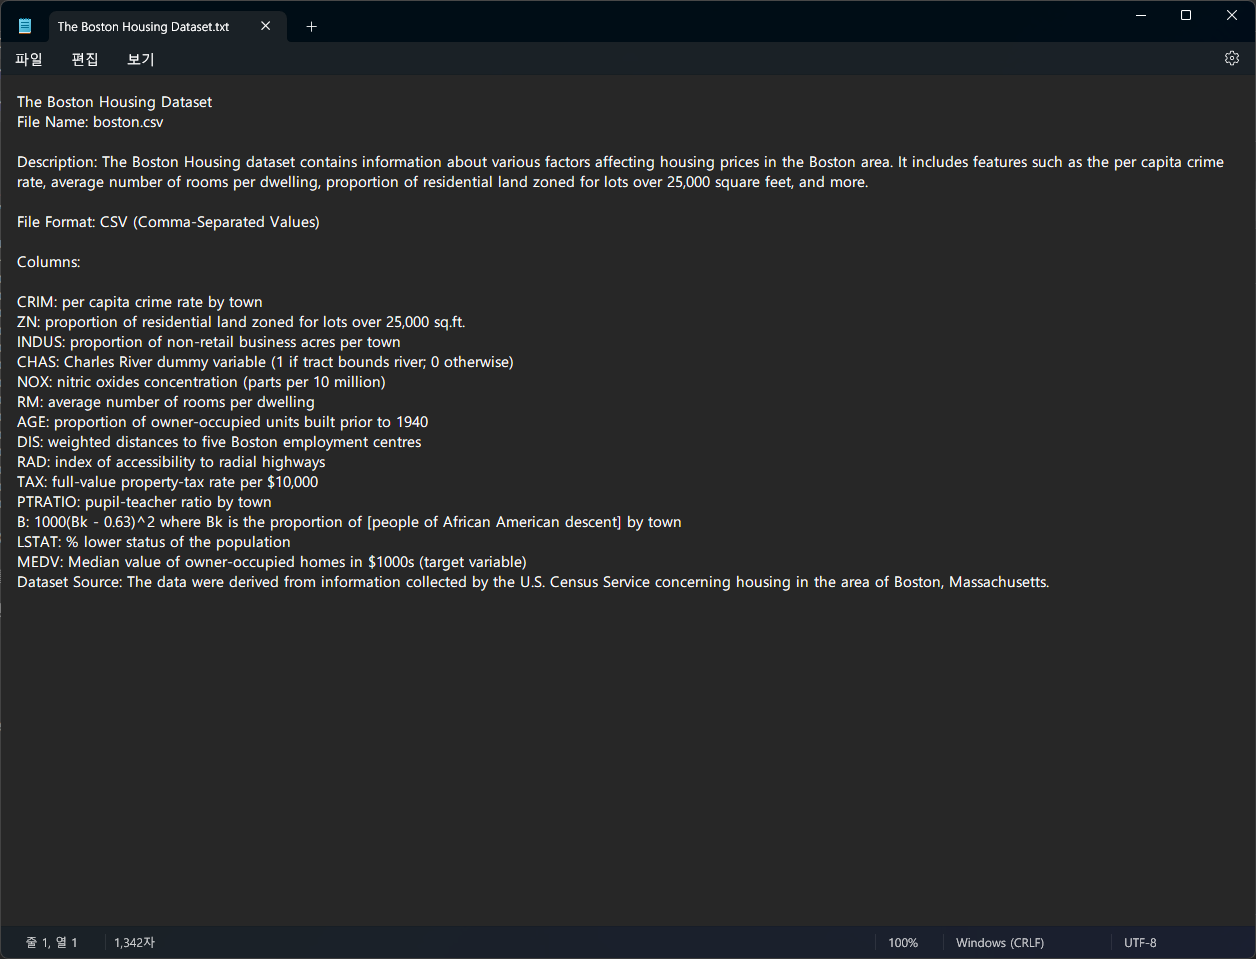

각 항목이 의미하는 바는 다음과 같습니다.

- CRIM : 도시별 인당 범죄율
- ZN : 25,000 평방피트 이상의 부지에 대한 주거용 토지 비율
- INDUS : 비소매사업 에이커의 비율
- CHAS : 찰스 강과 접하는지 여부 (강과 접하는 경우 1; 그렇지 않으면 0)
- NOX : 질소 산화물 농도 (1000만 분의 1 단위)
- RM : 주거 당 평균 방 수
- AGE : 1940년 이전에 건설된 소유 주택의 비율
- DIS : 보스턴 고용 센터 다섯 곳까지의 가중 거리
- RAD : 방사형 고속도로 접근성 지수
- TAX : \$10,000 당 전체 가치의 부동산세율
- PTRATIO : 도시별 학생 대 교사 비율
- B : $1000(B_k - 0.63)^2$, 여기서 $B_k$는 도시 별 아프리카계 미국인 비율의 비율
- LSTAT : 인구 중 하위 계층의 비율 (%)
- MEDV : 소유 주택의 중앙값 ($1000 단위, 목표 변수)

저희는 문제 정의에서 소유 주택의 중앙값을 예측하기로 했기 때문에, 타겟 변수는 MEDV가 될 것이고, 나머지 13개의 변수들이 독립변수가 됩니다!

그렇다면 **종속변수가 1개**이기 때문에 해당 데이터 분석은 **일변량 데이터 분석**이 되겠네요👍

그외에도 주목할 점은
- CHAS 변수같은 경우 값이 0과 1로만 구성되어있다.(범주형 자료)
- NOX 변수의 단위는 1000만 분의 1이다.
- DIS 변수의 거리는 가중 거리이다.
- MEDV 변수의 단위는 $1000 단위이다.

등이 있습니다. 이처럼 각 변수의 단위나 계산된 방식을 이해하는 것은 데이터 분석에서 중요합니다.🔥

## 7. 이상치 및 결측치 확인 및 처리
어느 정도 데이터를 확인해보았으니 우선 데이터에 이상치나 결측치가 있는 지 확인해봅시다.

먼저 결측치가 있는지 확인하는 코드는 다음과 같이 작성합니다.

In [ ]:
df."---------직접 채우기---------".sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

놀랍게도 이 데이터에는 결측치가 존재하지 않습니다...!

하지만 이는 굉장히 이상적인 경우이기 때문에 현실의 데이터에선 보기 드뭅니다😓

## 8. 각 변수에 대한 통계치 및 분포 확인
우선, 각 변수에 대한 통계치를 살펴본 다음 분포에 대한 시각화를 진행해보도록 합시다!

아래 코드를 이용하면 각 변수에 대한 통계치들을 출력해볼 수 있습니다.

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


좀 더 데이터를 명확하게 보기 위해서 시각화를 해봅시다!

먼저 박스플롯으로 시각화를 해보겠습니다. 박스플롯은 총 5개의 통계량을 나타냅니다.

제1~3사분위수, 최솟값, 최댓값을 표현해줍니다. 또한 시각화 결과를 보면 파란 박스가 나타나는 것을 볼 수 있는데, 이를 사분위수 구간(Inter-Quartile Range, $\text{IQR}$)이라고 합니다. 사분위수 구간은 제1사분위수($Q1$)과 제3사분위수($Q3$)의 차로 나타납니다.

수염은 다음과 같은 기준으로 그립니다.

- 왼쪽 수염 : $Q1 - 1.5 * \text{IQR}$
- 오른쪽 수염 : $Q3 + 1.5 * \text{IQR}$

수염의 외부에 있는 값들은 이상치로 판단합니다.

(7, 2)


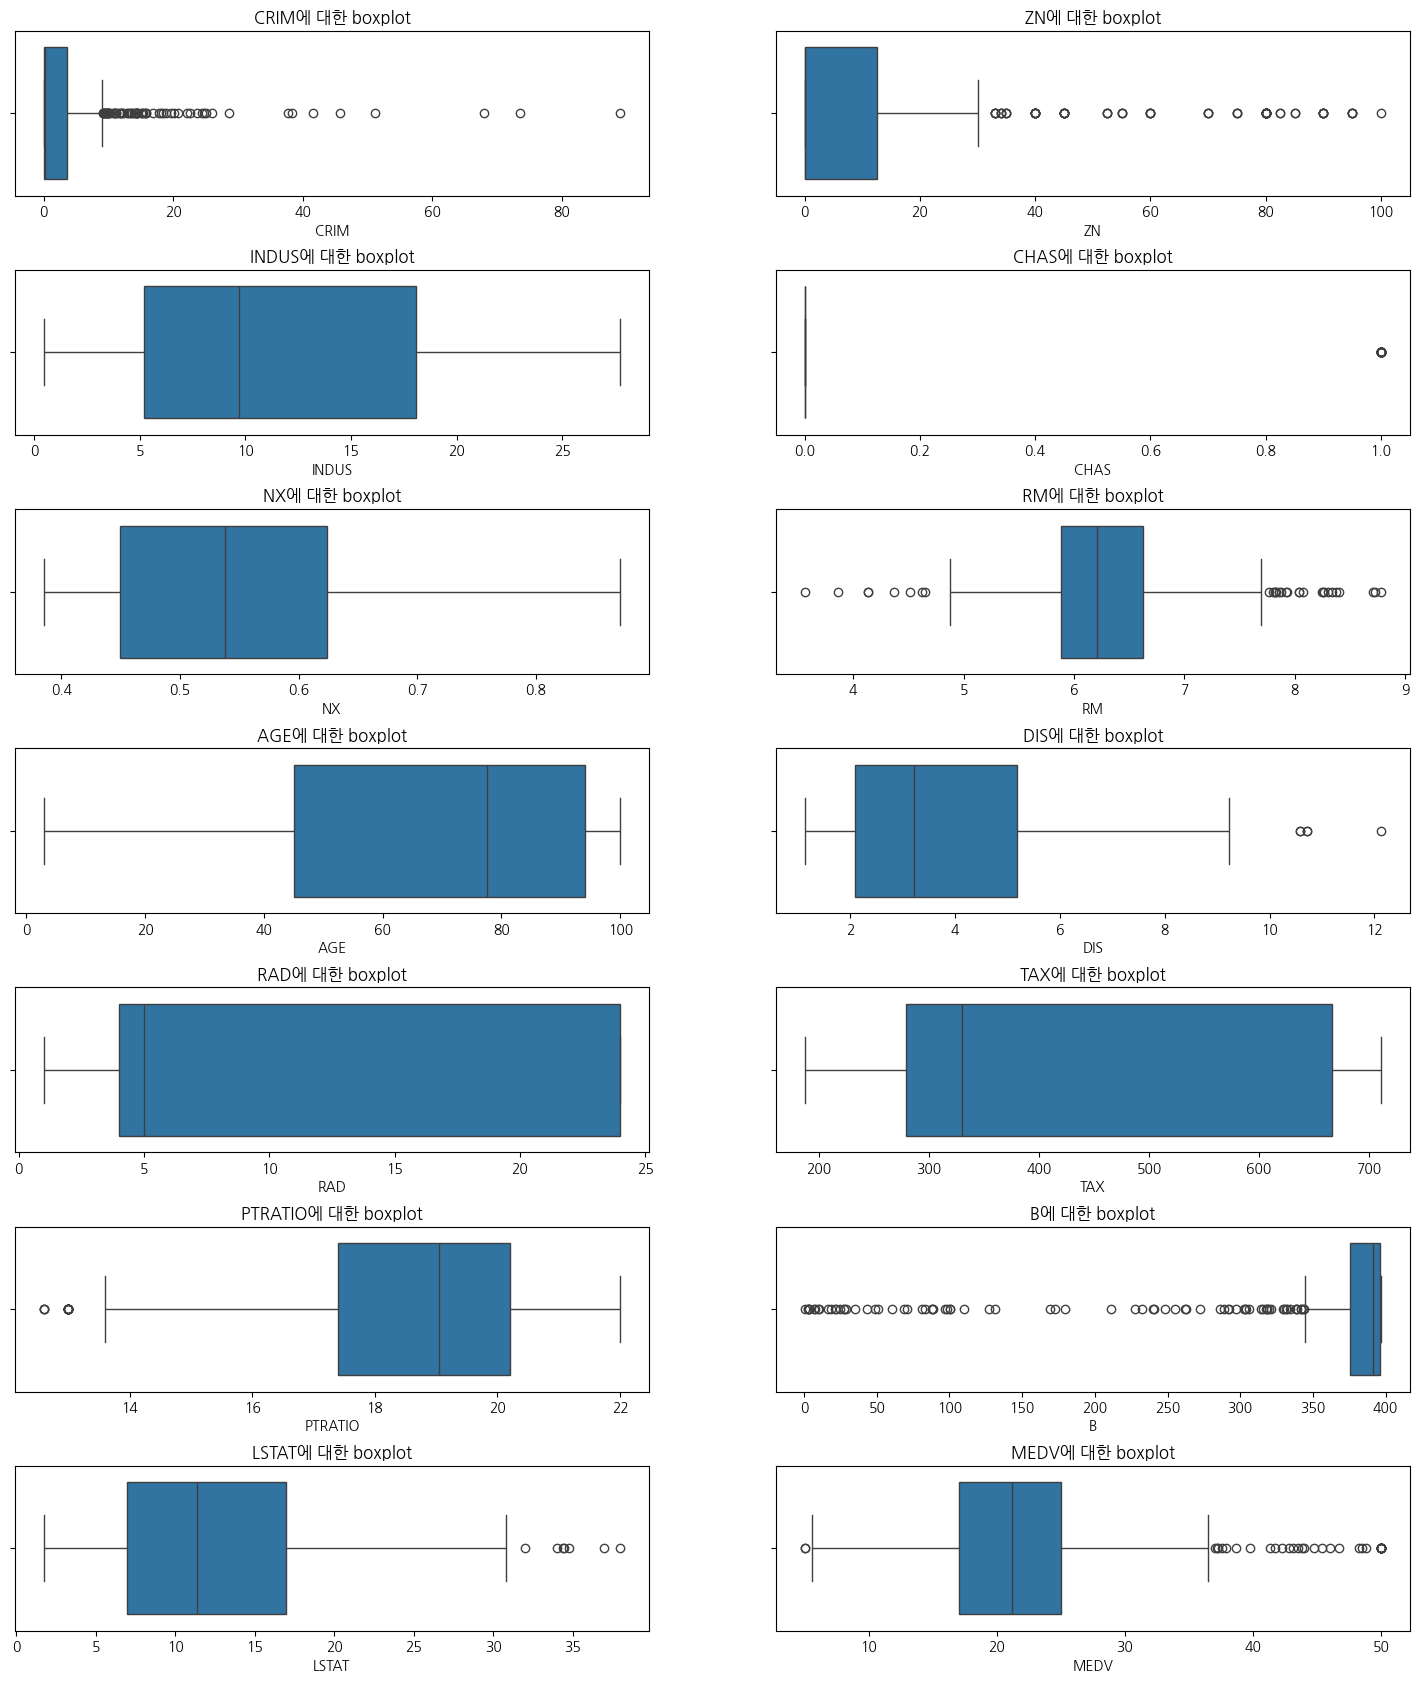

In [ ]:
columns = df.columns
columns_num = len(columns) # 변수의 개수
fig, axs = plt.subplots(columns_num // 2, 2, figsize=(18, 20))
axs = axs.ravel() # axs array 1차원으로 만들기

plt.rc('font', family='NanumGothic')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.45) # 각 그래프 간 간격 조절을 위한 코드

for i, col in enumerate(columns):
    ax = axs[i]
    sns.boxplot(data=df, x=col, ax=ax) # 박스플롯 그리기
    ax.set_title(f"{col}에 대한 boxplot") # 각 박스플롯의 제목 설정하기

히스토그램으로도 확인해봅시다! pandas 라이브러리를 이용하면 데이터프레임의 각 변수 별 히스토그램을 쉽게 그릴 수 있습니다.

아래 코드를 이용하면 히스토그램을 그릴 수 있습니다!
```python
df.hist(bins=20, figsize=(20, 15))
```

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

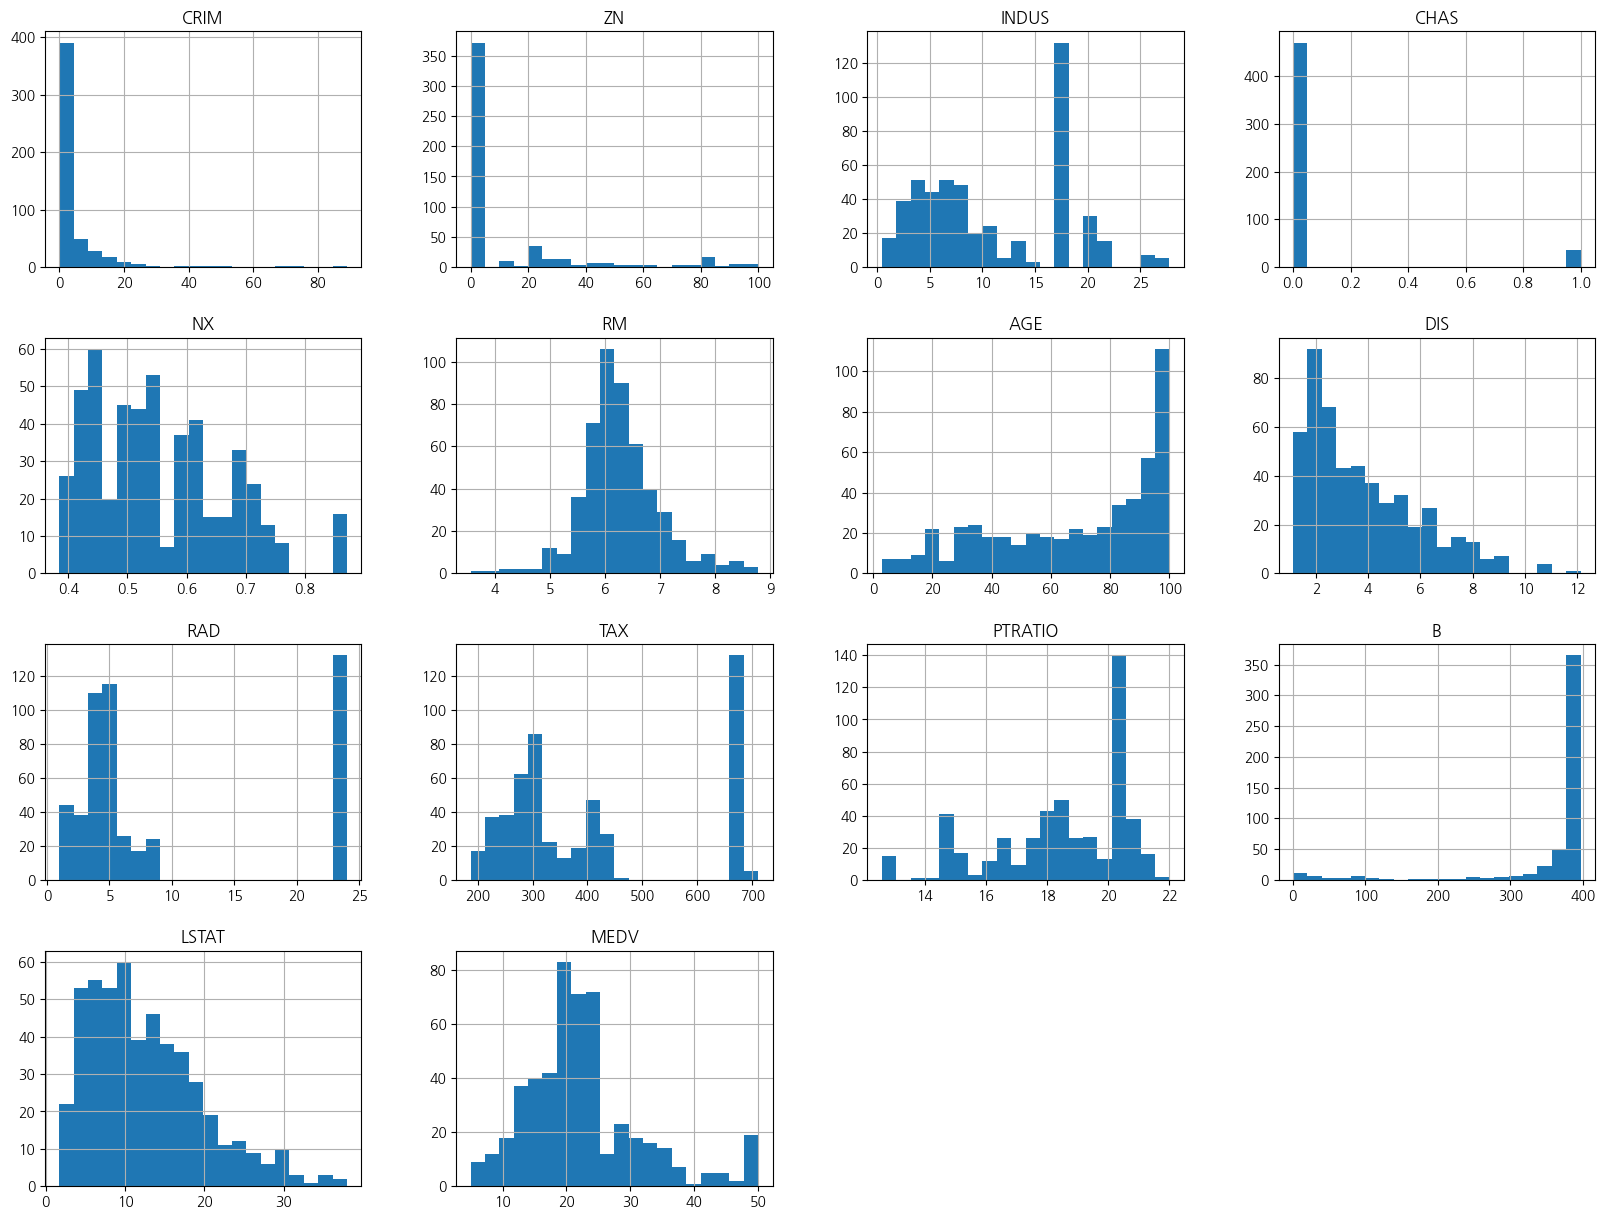

In [ ]:
df.hist(bins=20, figsize=(20, 15))

## 9. 변수 간 상관관계 확인하기
데이터의 분포를 어느 정도 살펴보았으니 각 변수 간 어떤 상관관계를 띄는지 살펴봅시다!

상관관계(correlation)란 두 변수가 선형성의 경향을 띄는 관계를 뜻합니다.

상관관계를 나타내는 값을 ``상관계수``라고 하고, 상관계수를 통해서 상관관계의 강도를 알 수 있습니다. 상관계수의 절댓값이 클수록 선형성이 강하다고 하고, 0이라면 선형성이 없다고 합니다.

상관계수는 아래와 같이 계산됩니다.

$$
r = \frac{\sum_{i=1}^n{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum_{i=1}^n{(X_i - \bar{X})^2}} \sqrt{\sum_{i=1}^n{(Y_i - \bar{Y})^2}}}
$$

상관관계를 해석할 때 조심해야할 점은 크게 두가지입니다.
1. 상관관계는 인과관계가 아닙니다! 즉, "X가 증가하면 Y가 증가한다"란 표현은 상관관계를 적절치 못하게 해석한 것입니다😒
2. 상관계수가 낮다고 해서 비선형의 가능성을 배제하면 안됩니다! 상관계수가 낮다는 말은 선형성의 강도가 약하다는 것이지 비선형성의 강도 또한 약하다는 것을 의미하지 않습니다.

pandas 라이브러리를 통해서 상관계수를 구해봅시다! 아래 코드를 이용하면 데이터프레임의 각 변수의 상관계수를 쉽게 계산할 수 있습니다.
```python
df.corr()
```

상관계수에 대한 시각화는 히트맵(heatmap)을 통해 나타낼 수 있습니다. 아래 코드는 위 코드로 구한 상관계수를 통해 히트맵 시각화를 하는 코드입니다.
```python
sns.heatmap(df.corr(), annot=True)
```

<Axes: >

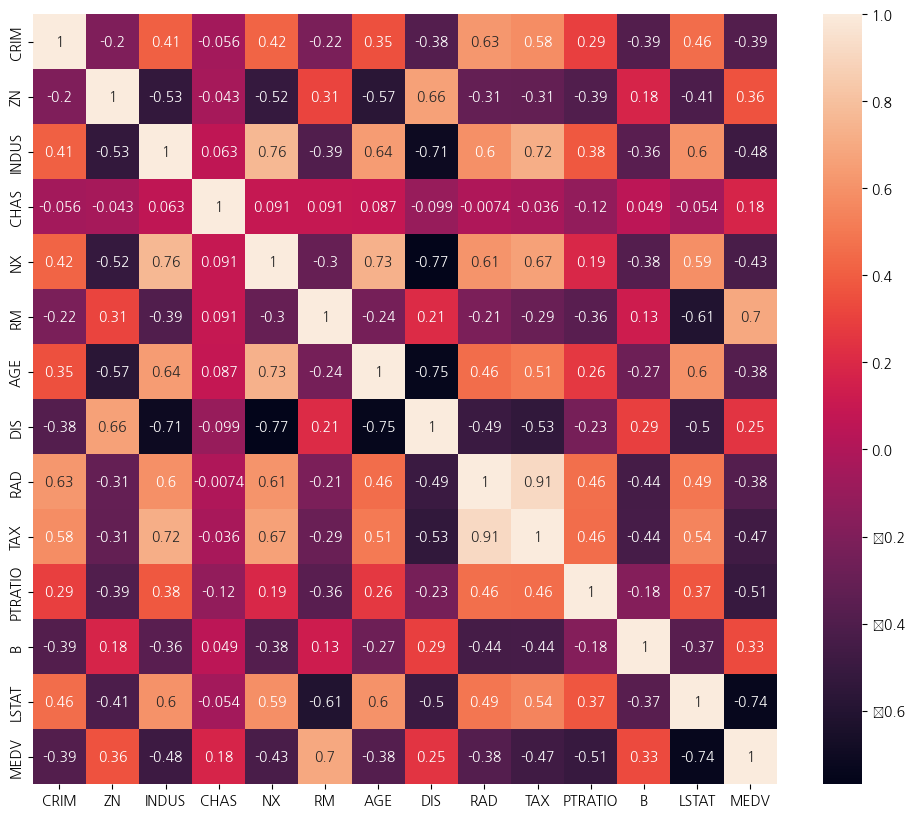

In [ ]:
plt.figure(figsize=(12, 10)) # 차트 사이즈 설정하기
sns.heatmap(df.corr(), annot=True) # annot 매개변수가 False라면 네모칸 안의 상관계수를 출력하지 않습니다.

상관관계가 높다고 나오는 두 변수들 중 몇 개를 골라 시각화를 해봅시다. 상관관계에 대한 시각화는 히트맵 이외에도 산점도를 이용하기도 합니다.

matplotlib 라이브러리는 산점도를 그릴 수 있는 함수를 제공합니다.
아래 코드를 통해 산점도를 그릴 수 있습니다.
```python
plt.scatter(df[var1], df[var2], alpha=0.6)
```

In [ ]:
def plot_corr_scatter(df, var1, var2):
    plt.figure(figsize=(10, 8)) # 차트 사이즈 설정
    plt.title(f"{var1} 와/과 {var2}의 상관관계") # 제목 설정
    plt.scatter("---------직접 채우기---------", "---------직접 채우기---------", alpha=0.6) # 산점도 그리기

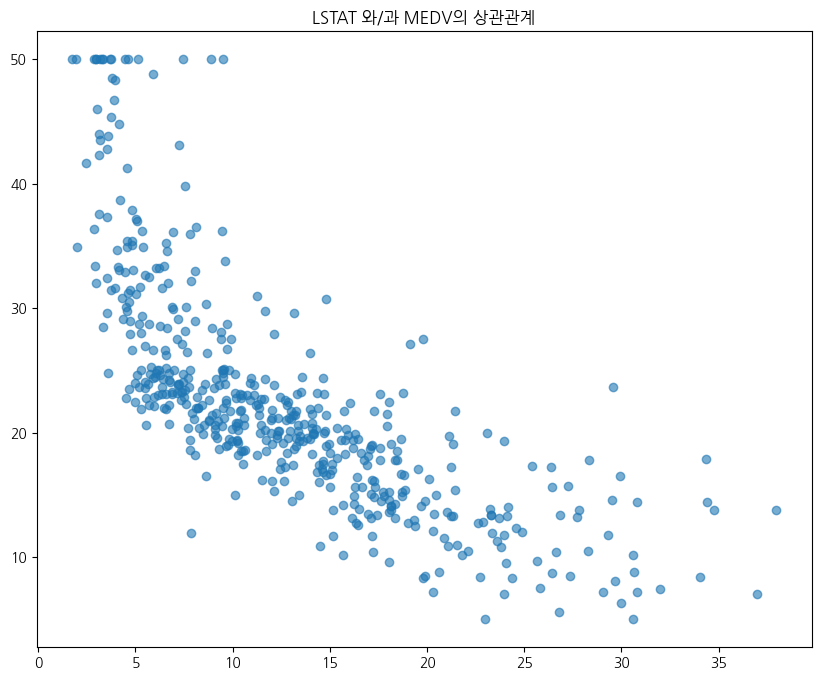

In [ ]:
plot_corr_scatter(df, 'LSTAT', 'MEDV')